#About the Dataset: Breast Cancer Wisconsin Diagnostic Dataset

The BCWD dataset is one of the datasets typically used in machine learning classification tasks; it has a wide use case, especially in medical research and diagnostic modeling. It is included in scikit-learn and contains measurements computed from digitized images of breast tissue biopsies.

#GitHub Link: https://github.com/saivardhan98/Machine-Learning-Tutorial

#Importing Required Libraries
This cell loads all libraries needed for:

Numerical processing (numpy)

Data handling (pandas)

Visualization (matplotlib)

Machine learning (sklearn)

Plotting the decision tree and confusion matrix

This prepares the environment for data loading, training, evaluation, and visualization.

In [ ]:
# Load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


#Loading the Dataset
The Wisconsin Diagnostic dataset for breast cancer is loaded into the notebook from sklearn.datasets.

 This dataset includes:

 Characteristics:  Thirty numerical measurements derived from images of breast cancer cells

 Target labels: 1 (benign) and 0 (malignant)

 The cell divides the dataset into:

 X → feature matrix

 y → labels

 feature_names and class_names for plot labelling in the future

In [ ]:
# Load the Breast Cancer Wisconsin Diagnostic dataset
data = load_breast_cancer()

X = data.data
y = data.target

feature_names = data.feature_names
class_names = data.target_names

print("Dataset shape:", X.shape)
print("Classes:", class_names)


Dataset shape: (569, 30)
Classes: ['malignant' 'benign']


#Splitting Data into Test and Train Sets
An ML standard procedure to prevent overfitting.

It does this by dividing the data into training and testing, in the ratio of 70:30, respectively.

For reproducibility, train_test_split will be used with a fixed random seed.

This enables the testing of the model on data that it has never seen and training on a single set of data.

In [ ]:
# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 398
Testing samples: 171


#Training the Decision Tree Classifier

 This is how a decision tree is trained:

 The splitting criterion is Gini impurity.

 max_depth = 4, so that the tree is not overly intricate.

 42 is the random_state for reproducibility.

 The cell that follows demonstrates controlled model complexity, which improves interpretability and lessens overfitting.

In [ ]:
# Train a decision tree with mild regularization
clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    min_samples_leaf=5,
    random_state=42
)

clf.fit(X_train, y_train)

print("Tree depth:", clf.get_depth())
print("Number of leaves:", clf.get_n_leaves())


Tree depth: 4
Number of leaves: 10


#Making Predictions & Computing Accuracy

The trained model is tested on unseen test data:

y_pred → predictions made by the model

accuracy_score() → calculates how often the model was correct

This gives a quick understanding of the model’s performance.

In [ ]:
# Predict on test data
y_pred = clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Test Accuracy: 0.936

Classification Report:
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        64
      benign       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



#Confusion Matrix Visualization

This is an essential diagnostic tool.

The confusion matrix shows:

True Positives

True Negatives

False Positives

False Negatives

It helps assess model strengths and weaknesses—especially in medical diagnostics where different error types have different consequences.

The notebook uses ConfusionMatrixDisplay for a clean visualization.

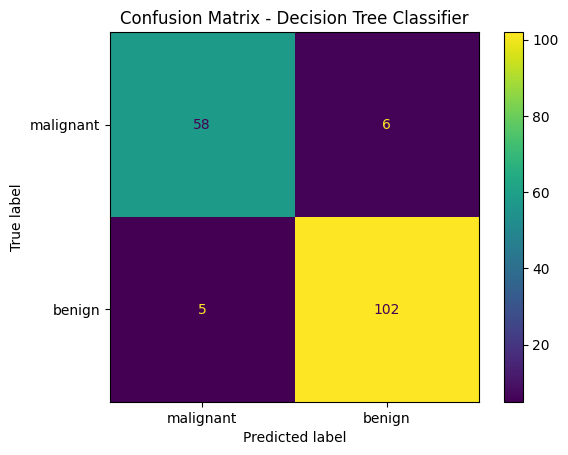

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format='d')
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()


#Visualizing the Decision Tree

This cell plots the entire tree using plot_tree().

The visualization lets you see:

How each decision node splits on a feature

Thresholds used for decisions

Predicted class at each leaf

Colors indicating class distribution

This enhances interpretability—one of the biggest advantages of decision trees.

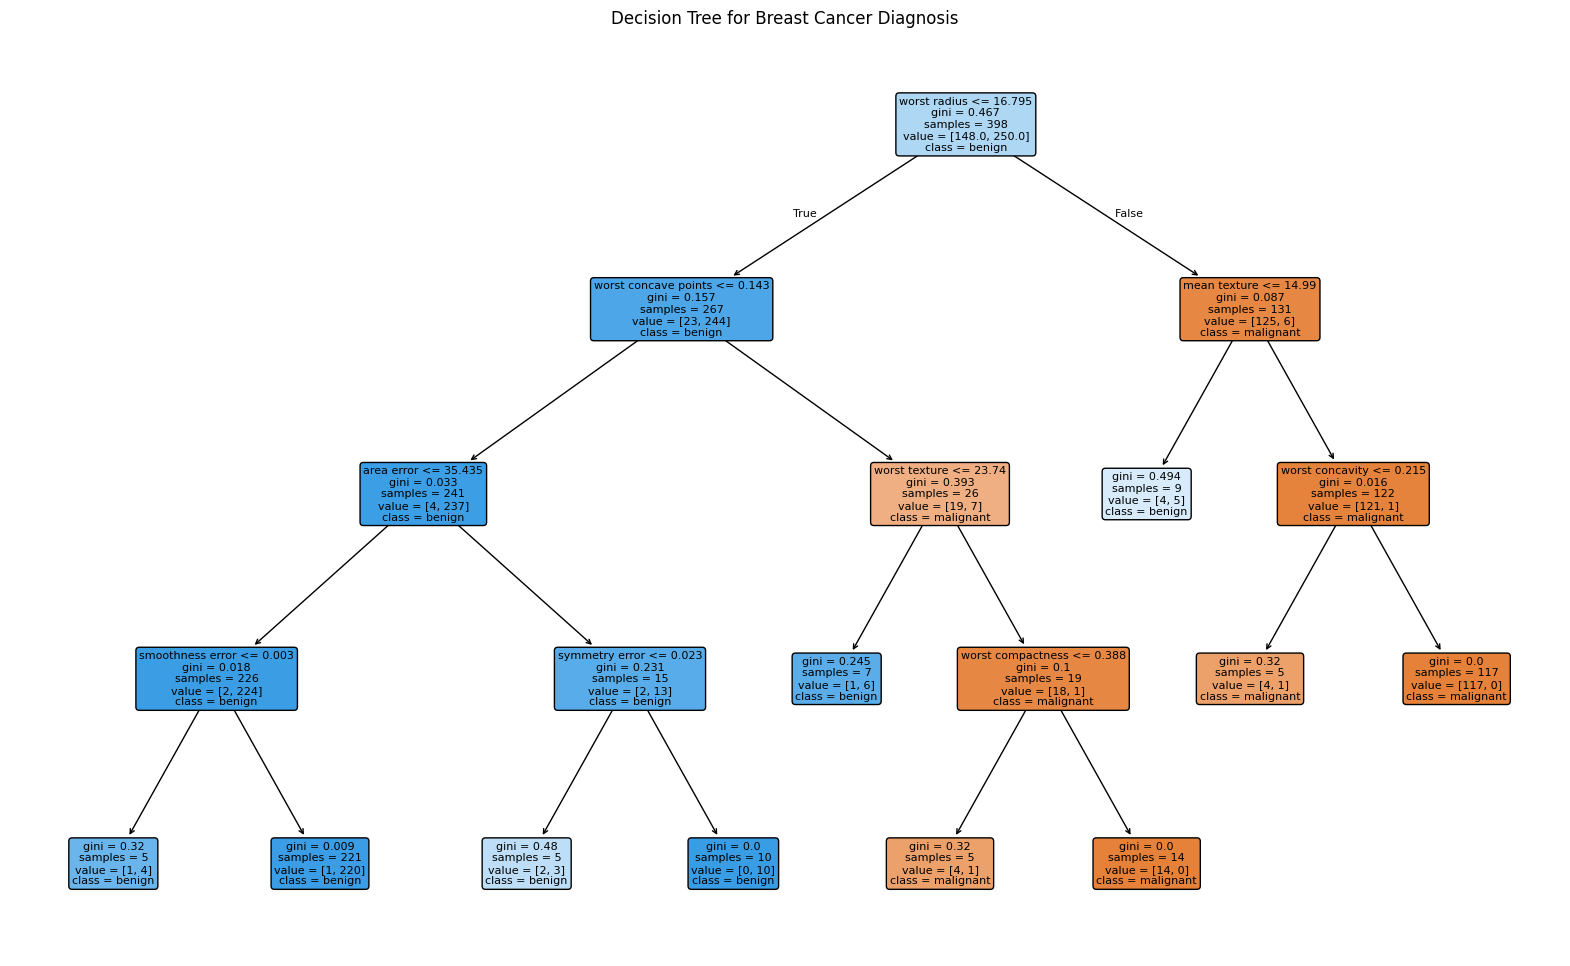

In [ ]:
plt.figure(figsize=(20, 12))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree for Breast Cancer Diagnosis")
plt.show()


#Computing Feature Importance

Decision Trees compute an importance score for each feature based on:

How often the feature is used for splitting

How much it reduces impurity

This cell:

Extracts feature importances

Puts them into a DataFrame for easy viewing

This helps identify which medical features contribute most to diagnosis.

In [ ]:
importances = clf.feature_importances_

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(fi_df.head(10))


                 feature  importance
20          worst radius    0.776421
27  worst concave points    0.140342
21         worst texture    0.038819
1           mean texture    0.029443
18        symmetry error    0.006253
13            area error    0.002556
26       worst concavity    0.002249
14      smoothness error    0.002190
25     worst compactness    0.001728
5       mean compactness    0.000000


#Plotting Feature Importance

A bar plot is created showing the top features based on importance.

This makes it easy to:

See which biological measurements are most relevant

Communicate results to non-ML audiences

Guide domain experts toward high-impact variables

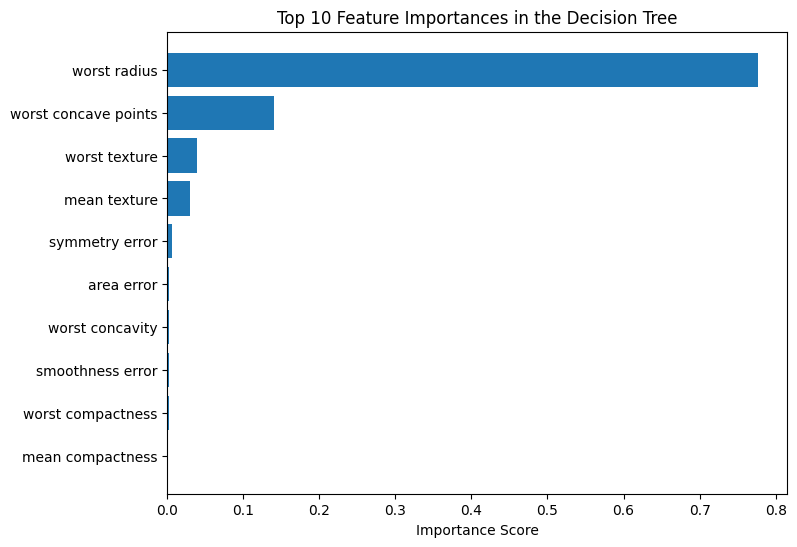

In [ ]:
# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(fi_df["feature"].head(10), fi_df["importance"].head(10))
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 10 Feature Importances in the Decision Tree")
plt.show()


#References

1. UCI Machine Learning Repository – Breast Cancer Wisconsin (Diagnostic) Data Set:
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

2. scikit-learn Dataset Documentation – Breast Cancer:
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

3. Breiman, L., Friedman, J.H., Olshen, R.A., & Stone, C.J. (1984).
Classification and Regression Trees (CART).
Wadsworth Statistics/Probability Series.

4. scikit-learn Documentation – DecisionTreeClassifier:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

5. scikit-learn User Guide – Decision Trees:
https://scikit-learn.org/stable/modules/tree.html

6. scikit-learn Documentation – Confusion Matrix:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

7. scikit-learn Tree Plotting Documentation:
https://scikit-learn.org/stable/modules/tree.html#tree-visualization

8. Matplotlib Documentation:
https://matplotlib.org/stable/index.html